# Plot RXE comparisons

In [1]:
library(ggpubr)
library(tidyverse)

Loading required package: ggplot2

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.1.8     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0
✔ purrr   1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
save_ggplots <- function(p, fn, w=7, h=7){
    for(ext in c('.svg', '.png', '.pdf')){
        ggsave(p, filename=paste0(fn, ext), width=w, height=h)
    }
}

In [3]:
df = data.table::fread("../../_m/RXE_public.csv") |> 
    mutate_if(is.character, as.factor)
levels(df$Sex) <- c("Female", "Male")
levels(df$Dx) <- c("CTL", "SZ")
levels(df$Region) <- c("Caudate", "DLPFC", "Hippocampus")
df |> head(2)

SAMPLE_ID,Autosome,X,sample,RXE,RNum,Sex,Dx,Region
<fct>,<dbl>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
R12864_H5FM2BBXX,2.332196,2.461731,R12864,0.12953529,R12864,Female,SZ,Caudate
R12865_H5FM2BBXX,2.740215,2.829693,R12865,0.08947798,R12865,Male,SZ,Caudate


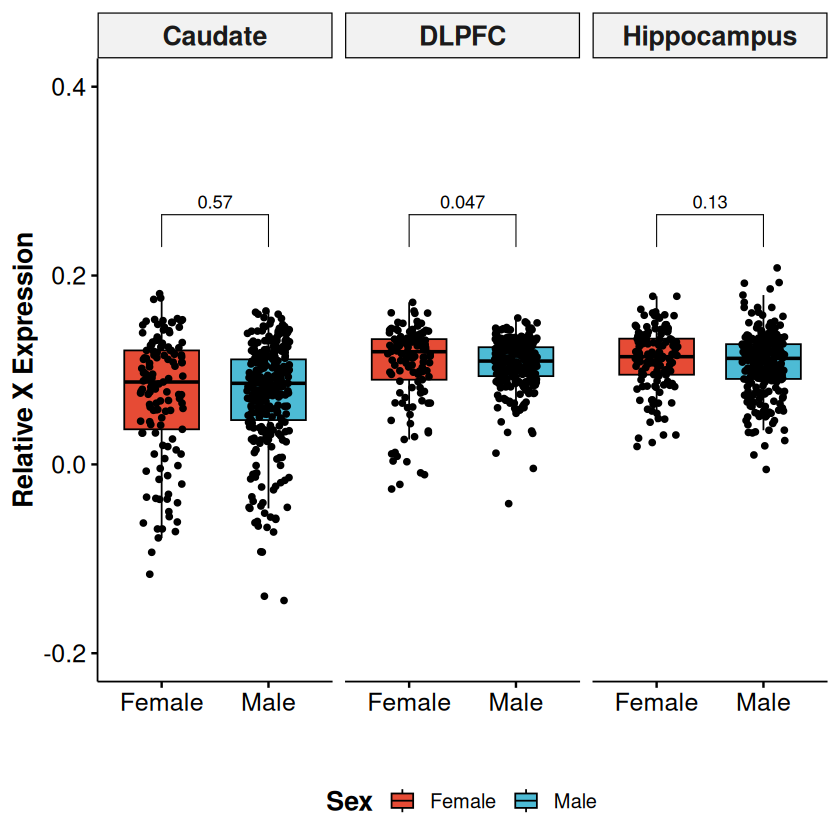

In [4]:
bxp = df |> 
    ggboxplot(x="Sex", y="RXE", fill='Sex', xlab='', palette="npg",
              add='jitter', outlier.shape=NA, facet.by='Region',
              ylab='Relative X Expression', ylim=c(-0.2, 0.4),
              panel.labs.font=list(face='bold', size=16), 
              legend="bottom", ggtheme=theme_pubr(base_size=15)) + 
    stat_compare_means(comparisons=list(c("Female", "Male")))+
    font("xy.title", size=16, face="bold") + 
    font("legend.title", size=16, face="bold")
save_ggplots(bxp, "rxe_sex_byRegion", 7, 5)
bxp

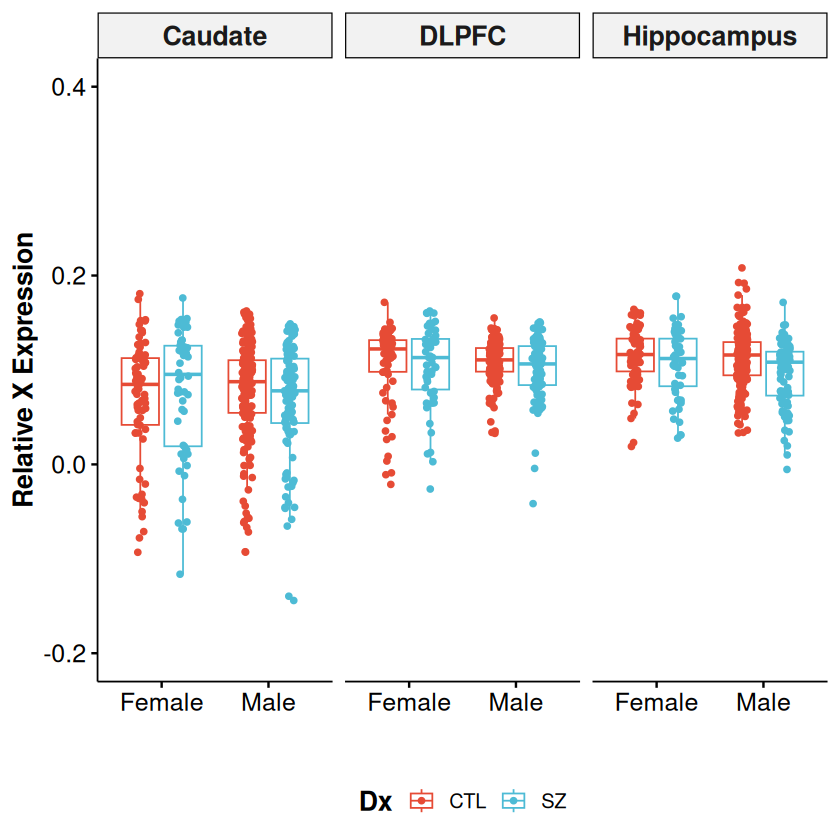

In [5]:
bxp = df |> 
    ggboxplot(x="Sex", y="RXE", color='Dx', xlab='', palette="npg",
              add='jitter', outlier.shape=NA, facet.by='Region',
              ylab='Relative X Expression', ylim=c(-0.2, 0.4),
              panel.labs.font=list(face='bold', size=16), 
              legend="bottom", ggtheme=theme_pubr(base_size=15)) + 
    font("xy.title", size=16, face="bold") + 
    font("legend.title", size=16, face="bold")
save_ggplots(bxp, "rxe_sex_diagnosis_byRegion", 7, 5)
bxp

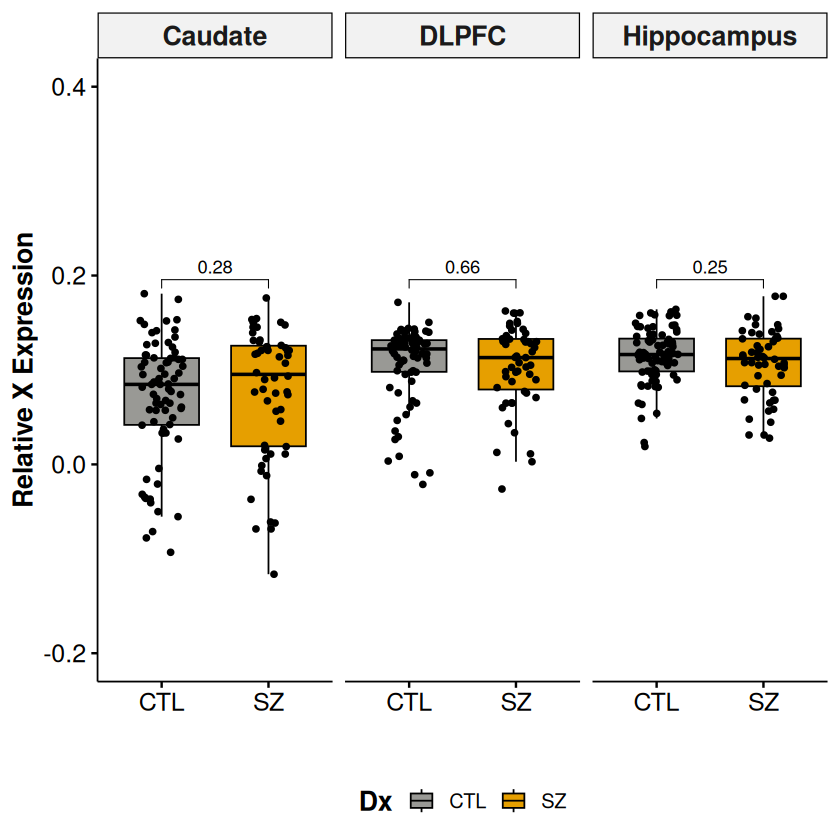

In [6]:
bxp_f = df |> filter(Sex=='Female') |>
    ggboxplot(x="Dx", y="RXE", fill='Dx', xlab='', 
              palette=c("#999995ff", "#e69f00ff"),
              add='jitter', outlier.shape=NA, facet.by=c('Region'),
              ylab='Relative X Expression', ylim=c(-0.2, 0.4),
              panel.labs.font=list(face='bold', size=16), 
              legend="bottom", ggtheme=theme_pubr(base_size=15)) + 
    stat_compare_means(comparisons=list(c("CTL", "SZ")))+
    font("xy.title", size=16, face="bold") + 
    font("legend.title", size=16, face="bold")
save_ggplots(bxp_f, "rxe_female_diagnosis_byRegion", 7, 5)
bxp_f

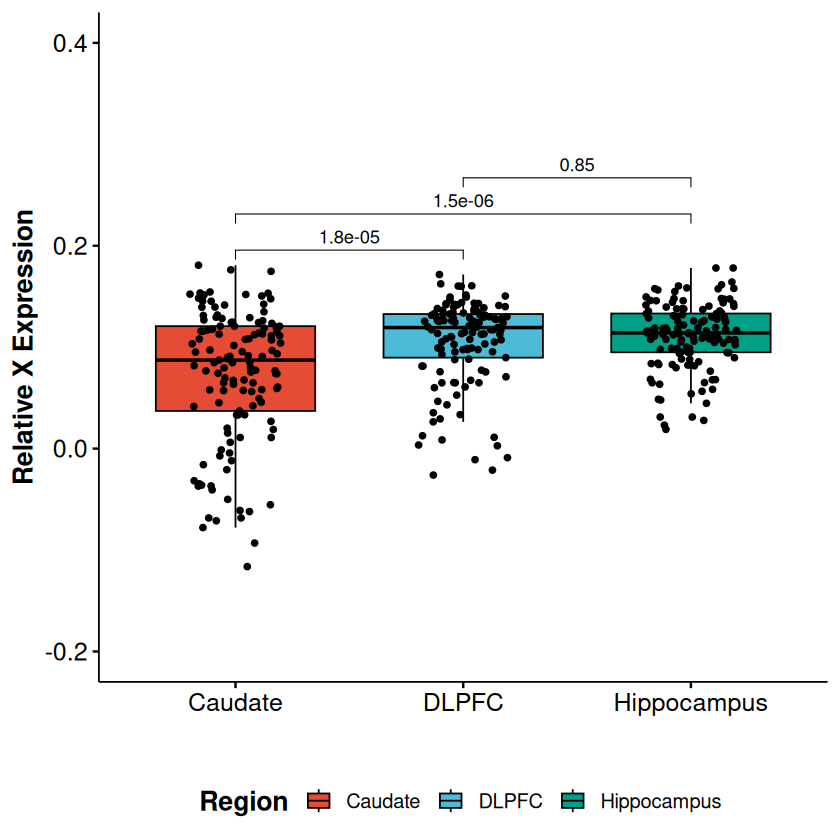

In [7]:
bxp_f2 = df |> filter(Sex=='Female') |>
    ggboxplot(x="Region", y="RXE", fill='Region', xlab='', palette="npg",
              add='jitter', outlier.shape=NA, 
              ylab='Relative X Expression', ylim=c(-0.2, 0.4),
              panel.labs.font=list(face='bold', size=16), 
              legend="bottom", ggtheme=theme_pubr(base_size=15)) + 
    stat_compare_means(comparisons=list(c("Caudate", "DLPFC"), 
                                        c("Caudate", "Hippocampus"), 
                                        c("DLPFC", "Hippocampus")))+
    font("xy.title", size=16, face="bold") + 
    font("legend.title", size=16, face="bold")
save_ggplots(bxp_f2, "rxe_female_region", 6, 6)
bxp_f2

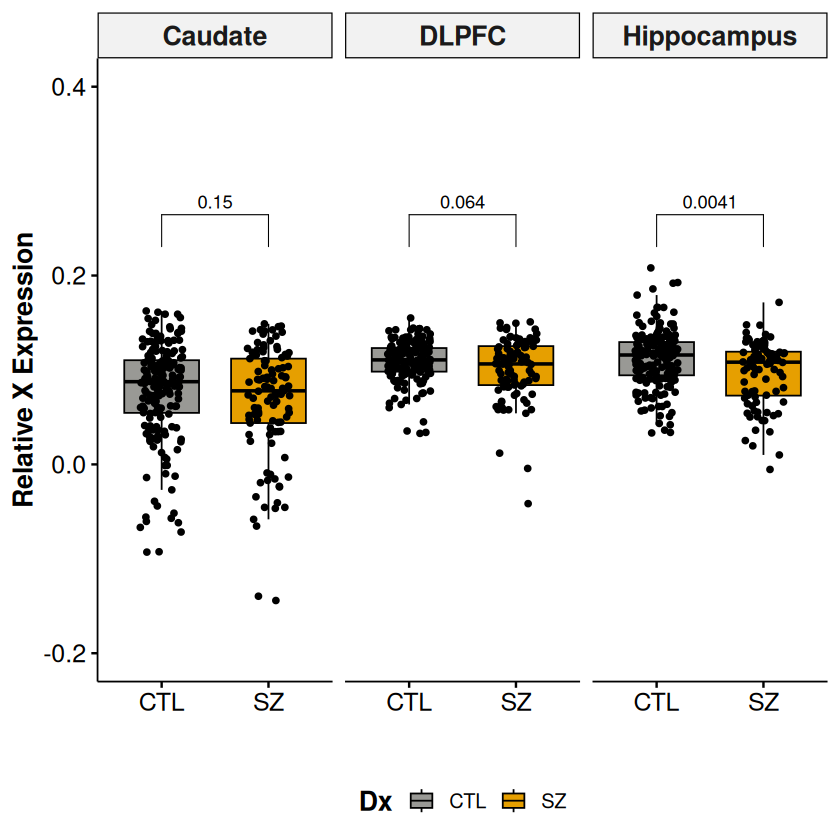

In [8]:
bxp_m = df |> filter(Sex=='Male') |>
    ggboxplot(x="Dx", y="RXE", fill='Dx', xlab='', 
              palette=c("#999995ff", "#e69f00ff"),
              add='jitter', outlier.shape=NA, facet.by=c('Region'),
              ylab='Relative X Expression', ylim=c(-0.2, 0.4),
              panel.labs.font=list(face='bold', size=16), 
              legend="bottom", ggtheme=theme_pubr(base_size=15)) + 
    stat_compare_means(comparisons=list(c("CTL", "SZ")))+
    font("xy.title", size=16, face="bold") + 
    font("legend.title", size=16, face="bold")
save_ggplots(bxp_m, "rxe_male_diagnosis_byRegion", 7, 5)
bxp_m

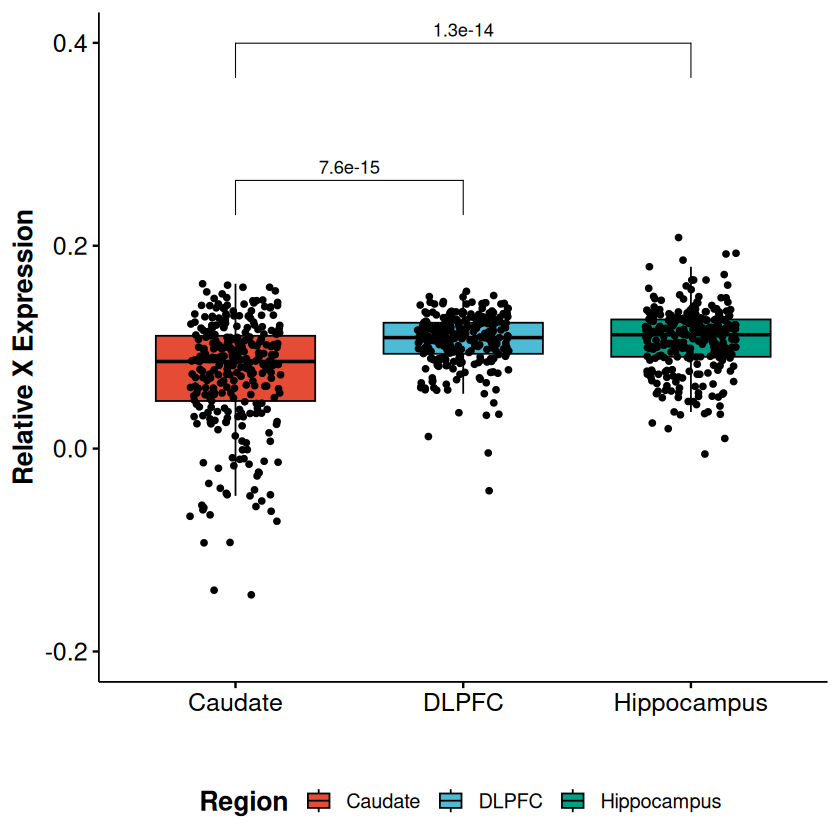

In [9]:
bxp_m2 = df |> filter(Sex=='Male') |>
    ggboxplot(x="Region", y="RXE", fill='Region', xlab='', palette="npg",
              add='jitter', outlier.shape=NA, 
              ylab='Relative X Expression', ylim=c(-0.2, 0.4),
              panel.labs.font=list(face='bold', size=16), 
              legend="bottom", ggtheme=theme_pubr(base_size=15)) + 
    stat_compare_means(comparisons=list(c("Caudate", "DLPFC"), 
                                        c("Caudate", "Hippocampus"), 
                                        c("DLPFC", "Hippocampus")))+
    font("xy.title", size=16, face="bold") + 
    font("legend.title", size=16, face="bold")
save_ggplots(bxp_m2, "rxe_male_region", 6, 6)
bxp_m2

## Repreducibility Information

In [10]:
Sys.time()
proc.time()
options(width = 120)
sessioninfo::session_info()

[1] "2023-03-23 10:08:09 EDT"

   user  system elapsed 
  8.200   0.089  11.096 

,package,ondiskversion,loadedversion,path,loadedpath,attached,is_base,date,source,md5ok,library
,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<chr>,<chr>,<lgl>,<fct>
abind,abind,1.4.5,1.4-5,/home/kynon/R/x86_64-pc-linux-gnu-library/4.2/abind,/home/kynon/R/x86_64-pc-linux-gnu-library/4.2/abind,FALSE,FALSE,2016-07-21,CRAN (R 4.2.1),NA,/home/kynon/R/x86_64-pc-linux-gnu-library/4.2
assertthat,assertthat,0.2.1,0.2.1,/home/kynon/R/x86_64-pc-linux-gnu-library/4.2/assertthat,/home/kynon/R/x86_64-pc-linux-gnu-library/4.2/assertthat,FALSE,FALSE,2019-03-21,CRAN (R 4.2.1),NA,/home/kynon/R/x86_64-pc-linux-gnu-library/4.2
backports,backports,1.4.1,1.4.1,/home/kynon/R/x86_64-pc-linux-gnu-library/4.2/backports,/home/kynon/R/x86_64-pc-linux-gnu-library/4.2/backports,FALSE,FALSE,2021-12-13,CRAN (R 4.2.1),NA,/home/kynon/R/x86_64-pc-linux-gnu-library/4.2
base64enc,base64enc,0.1.3,0.1-3,/home/kynon/R/x86_64-pc-linux-gnu-library/4.2/base64enc,/home/kynon/R/x86_64-pc-linux-gnu-library/4.2/base64enc,FALSE,FALSE,2015-07-28,CRAN (R 4.2.1),NA,/home/kynon/R/x86_64-pc-linux-gnu-library/4.2
broom,broom,1.0.3,1.0.3,/home/kynon/R/x86_64-pc-linux-gnu-library/4.2/broom,/home/kynon/R/x86_64-pc-linux-gnu-library/4.2/broom,FALSE,FALSE,2023-01-25,CRAN (R 4.2.2),NA,/home/kynon/R/x86_64-pc-linux-gnu-library/4.2
car,car,3.1.1,3.1-1,/home/kynon/R/x86_64-pc-linux-gnu-library/4.2/car,/home/kynon/R/x86_64-pc-linux-gnu-library/4.2/car,FALSE,FALSE,2022-10-19,CRAN (R 4.2.2),NA,/home/kynon/R/x86_64-pc-linux-gnu-library/4.2
carData,carData,3.0.5,3.0-5,/home/kynon/R/x86_64-pc-linux-gnu-library/4.2/carData,/home/kynon/R/x86_64-pc-linux-gnu-library/4.2/carData,FALSE,FALSE,2022-01-06,CRAN (R 4.2.1),NA,/home/kynon/R/x86_64-pc-linux-gnu-library/4.2
cellranger,cellranger,1.1.0,1.1.0,/home/kynon/R/x86_64-pc-linux-gnu-library/4.2/cellranger,/home/kynon/R/x86_64-pc-linux-gnu-library/4.2/cellranger,FALSE,FALSE,2016-07-27,CRAN (R 4.2.1),NA,/home/kynon/R/x86_64-pc-linux-gnu-library/4.2
cli,cli,3.6.0,3.6.0,/home/kynon/R/x86_64-pc-linux-gnu-library/4.2/cli,/home/kynon/R/x86_64-pc-linux-gnu-library/4.2/cli,FALSE,FALSE,2023-01-09,CRAN (R 4.2.2),NA,/home/kynon/R/x86_64-pc-linux-gnu-library/4.2
